In [263]:
import requests
import base64
import re
import pandas as pd
import numpy as np
import json
import re 
import sys
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [264]:
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')
df3 = pd.read_csv('data3.csv')
df4 = pd.read_csv('data4.csv')

df = pd.concat([df1, df2, df3,df4], ignore_index=True)

In [265]:
df.head()

,Track Name,Artists,Album Name,Album Id,Track ID,Popularity,Release Date,Duration (ms),Explicit URLs,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Last Christmas - Remastered,Wham!,Twenty Five,5HaOXSCK1IlwzV4ve7CUKY,6wn2nmFn3wDuiMldRiuRuL,NaN,2006-11-11,267160,NaN,0.757,0.618,11,-7.964,0,0.0282,0.2620,0.000000,0.2210,0.861,106.856
1,It's Beginning to Look a Lot like Christmas,Michael Bublé,Christmas (Deluxe Special Edition),7uVimUILdzSZG4KKKWToq0,5a1iz510sv2W9Dt1MvFd5R,NaN,2012-11-09,206640,NaN,0.339,0.214,4,-11.714,1,0.0375,0.9080,0.000007,0.3410,0.363,94.775
2,Winter Wonderland - Spotify Singles Holiday,Laufey,Spotify Singles Holiday,1Ph9nV8cNv7Gq7yHOlmbgh,1LmkdWSxjCV7wKTPsCvYWN,NaN,2023-11-14,132800,NaN,0.528,0.281,2,-9.784,1,0.0370,0.8390,0.000000,0.0873,0.514,127.617
3,You Make It Feel Like Christmas (with Blake Sh...,"Gwen Stefani, Blake Shelton",You Make It Feel Like Christmas (Deluxe Editio...,0xXKtxOYqLBTjcefyh8Oz8,3SjaE7SExrVnRZi45KXT3O,NaN,2020-10-23,156773,NaN,0.635,0.870,2,-4.291,0,0.0400,0.0152,0.000000,0.1180,0.912,92.999
4,"Santa, Can’t You Hear Me","Kelly Clarkson, Ariana Grande",When Christmas Comes Around...,5sVFXIMrFRKBtDOexVlBBU,2O3MQ6H3gjrIWDcpeTrikT,NaN,2021-10-15,242645,NaN,0.495,0.896,11,-2.381,1,0.0331,0.0050,0.000000,0.3530,0.462,146.040


In [266]:
df.drop(columns=['Popularity', 'Explicit URLs'], inplace=True)

In [267]:
df.head()

,Track Name,Artists,Album Name,Album Id,Track ID,Release Date,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Last Christmas - Remastered,Wham!,Twenty Five,5HaOXSCK1IlwzV4ve7CUKY,6wn2nmFn3wDuiMldRiuRuL,2006-11-11,267160,0.757,0.618,11,-7.964,0,0.0282,0.2620,0.000000,0.2210,0.861,106.856
1,It's Beginning to Look a Lot like Christmas,Michael Bublé,Christmas (Deluxe Special Edition),7uVimUILdzSZG4KKKWToq0,5a1iz510sv2W9Dt1MvFd5R,2012-11-09,206640,0.339,0.214,4,-11.714,1,0.0375,0.9080,0.000007,0.3410,0.363,94.775
2,Winter Wonderland - Spotify Singles Holiday,Laufey,Spotify Singles Holiday,1Ph9nV8cNv7Gq7yHOlmbgh,1LmkdWSxjCV7wKTPsCvYWN,2023-11-14,132800,0.528,0.281,2,-9.784,1,0.0370,0.8390,0.000000,0.0873,0.514,127.617
3,You Make It Feel Like Christmas (with Blake Sh...,"Gwen Stefani, Blake Shelton",You Make It Feel Like Christmas (Deluxe Editio...,0xXKtxOYqLBTjcefyh8Oz8,3SjaE7SExrVnRZi45KXT3O,2020-10-23,156773,0.635,0.870,2,-4.291,0,0.0400,0.0152,0.000000,0.1180,0.912,92.999
4,"Santa, Can’t You Hear Me","Kelly Clarkson, Ariana Grande",When Christmas Comes Around...,5sVFXIMrFRKBtDOexVlBBU,2O3MQ6H3gjrIWDcpeTrikT,2021-10-15,242645,0.495,0.896,11,-2.381,1,0.0331,0.0050,0.000000,0.3530,0.462,146.040


In [268]:
print(df.isnull().sum())

Track Name          0
Artists             0
Album Name          0
Album Id            0
Track ID            0
Release Date        1
Duration (ms)       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64


In [269]:
df[df['Track Name']== "Agora Hills"]

,Track Name,Artists,Album Name,Album Id,Track ID,Release Date,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
94,Agora Hills,Doja Cat,Scarlet,6DmPNcfpkXBVRJsEIJY9tl,7dJYggqjKo71KI9sLzqCs8,2023-09-22,265360,0.750,0.674,8,-6.128,0,0.097,0.228,0.000089,0.122,0.392,123.026
815,Agora Hills,Doja Cat,Scarlet,1bBez9PNvkJPW08bU7NYta,5PyDJG7SQRgWXefgexqIge,2023-09-20,265360,0.755,0.687,8,-6.247,0,0.101,0.183,0.000177,0.125,0.381,123.010
2968,Agora Hills,Doja Cat,Scarlet,6DmPNcfpkXBVRJsEIJY9tl,7dJYggqjKo71KI9sLzqCs8,2023-09-22,265360,0.750,0.674,8,-6.128,0,0.097,0.228,0.000089,0.122,0.392,123.026


In [270]:
df['Artists_Song'] = df.apply(lambda row: row['Artists']+' '+row['Track Name'],axis = 1)

In [271]:
df.drop_duplicates('Artists_Song',inplace = True)

In [272]:
df[df['Track Name']== "Agora Hills"]

,Track Name,Artists,Album Name,Album Id,Track ID,Release Date,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Artists_Song
94,Agora Hills,Doja Cat,Scarlet,6DmPNcfpkXBVRJsEIJY9tl,7dJYggqjKo71KI9sLzqCs8,2023-09-22,265360,0.75,0.674,8,-6.128,0,0.097,0.228,0.000089,0.122,0.392,123.026,Doja Cat Agora Hills


In [273]:
df[df['Track Name']== "Charm"]

,Track Name,Artists,Album Name,Album Id,Track ID,Release Date,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Artists_Song
3615,Charm,Rema,Rave & Roses Ultra,0nayxjaX54Frd7GsZq6Pbs,1iBWjQ9af9NnUd5xnQDB3k,2023-04-27,204750,0.768,0.663,4,-6.901,0,0.0355,0.581,0.0,0.0974,0.559,96.039,Rema Charm


In [274]:
df.reset_index(drop=True, inplace=True)

In [275]:
df = df
scaler = MinMaxScaler()
music_properties = df[['Danceability','Energy','Key','Loudness','Mode','Speechiness','Acousticness',
                          'Instrumentalness','Liveness','Valence','Tempo']].values
music_properties_scaled = scaler.fit_transform(music_properties)

In [276]:
def song_recommendations(song_name, n=5):
    if song_name not in df['Track Name'].values:
        print(f"'{song_name}' not found in the dataset. Please enter a valid song name.")
        return

    input_song_index = df[df['Track Name'] == song_name].index[0]
    similarity_scores = cosine_similarity([music_properties_scaled[input_song_index]], music_properties_scaled)
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:n + 1]
    # Get the names of the most similar songs based on content-based filtering
    song_recommendations = df.iloc[similar_song_indices][['Track Name', 'Artists', 'Album Name', 'Release Date',
                                                          'Tempo','Danceability','Energy','Loudness']]
    song_recommendations.reset_index(drop=True, inplace=True)
    song_recommendations.index += 1
    
    return song_recommendations

In [277]:
song_name = "Charm"
result = df[df['Track Name'] == song_name]['Artists']
recommendations = song_recommendations(song_name, n=10)
print(f"Content based recommended songs for '{str(result.values[0]) +', '+song_name}':")
recommendations

Content based recommended songs for 'Rema, Charm':


,Track Name,Artists,Album Name,Release Date,Tempo,Danceability,Energy,Loudness
1,Distant,B Young,Differences,2021-07-30,104.995,0.693,0.508,-8.727
2,"PAMI (feat. Wizkid, Adekunle Gold & Omah Lay)","DJ Tunez, Wizkid, Adekunle Gold, Omah Lay","PAMI (feat. Wizkid, Adekunle Gold & Omah Lay)",2020-08-13,99.889,0.755,0.645,-6.933
3,BESO,"ROSALÍA, Rauw Alejandro",RR,2023-03-24,95.050,0.768,0.644,-6.671
4,HIBIKI,"Bad Bunny, Mora",nadie sabe lo que va a pasar mañana,2023-10-13,119.935,0.801,0.645,-5.605
5,You,"Belly, Kehlani",Another Day In Paradise,2016-05-27,96.011,0.658,0.700,-1.974
6,A Night To Remember,"beabadoobee, Laufey",A Night To Remember,2023-10-20,114.990,0.726,0.624,-7.799
7,soso,Omah Lay,Boy Alone,2022-07-14,105.016,0.711,0.725,-8.315
8,Cool With You,NewJeans,NewJeans 2nd EP 'Get Up',2023-07-21,134.993,0.752,0.650,-6.683
9,Lifting You,Jungle,Loving In Stereo,2021-08-13,107.025,0.674,0.671,-8.352
10,Si Tu Novio Te Deja Sola,"J Balvin, Bad Bunny",Si Tu Novio Te Deja Sola,2017-03-03,121.927,0.718,0.460,-9.498


In [17]:
song = "Fast Forward"
df[df['Track Name']=="Fast Forward"].iloc[0]

Track Name                    Fast Forward
Artists                          JEON SOMI
Album Name                       GAME PLAN
Album Id            7xMXoWstClAzBIo5lOAASu
Track ID            7jzOZuWgZ5gaMet9V5Ix1d
Popularity                             NaN
Release Date                    2023-08-07
Duration (ms)                       160578
Explicit URLs                          NaN
Danceability                         0.745
Energy                               0.619
Key                                      6
Loudness                            -5.782
Mode                                     0
Speechiness                         0.0479
Acousticness                       0.00125
Instrumentalness                  0.000295
Liveness                             0.117
Valence                              0.797
Tempo                                124.0
Artists_Song        JEON SOMI Fast Forward
Name: 582, dtype: object

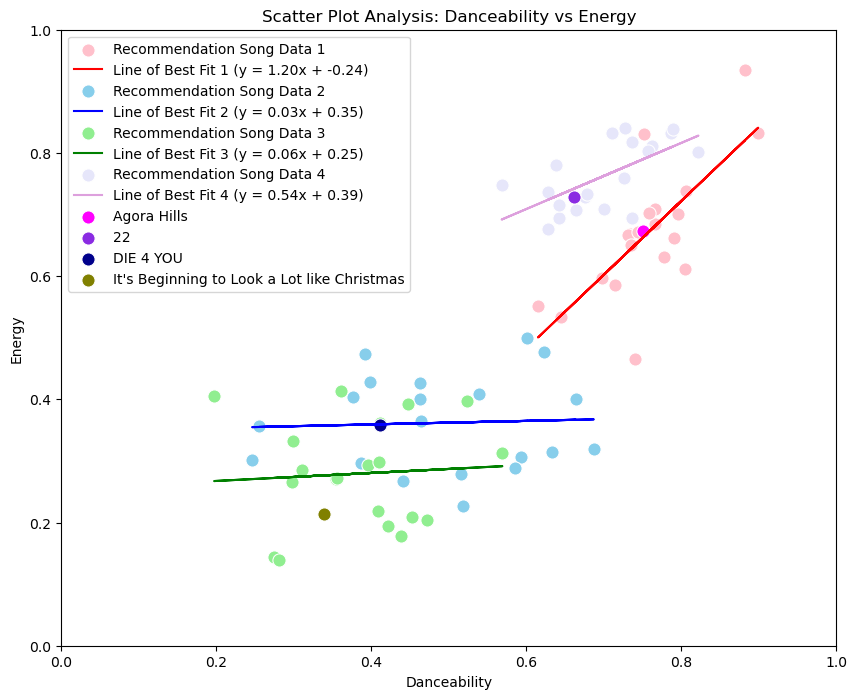

In [230]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# First Input Song
input_song1 = df[df['Track Name'] == "Agora Hills"]
song_recommend1 = song_recommendations("Agora Hills", n=20)
regression_data1 = song_recommend1[['Energy', 'Danceability']]

# Fit Linear Regression for Input Song 1
X1 = regression_data1[['Danceability']]
y1 = regression_data1['Energy']
regression_model1 = LinearRegression()
regression_model1.fit(X1, y1)
coef1 = regression_model1.coef_[0]
intercept1 = regression_model1.intercept_

# Second Input Song
input_song2 = df[df['Track Name'] == "DIE 4 YOU"]
song_recommend2 = song_recommendations("DIE 4 YOU", n=20)
regression_data2 = song_recommend2[['Energy', 'Danceability']]

# Fit Linear Regression for Input Song 2
X2 = regression_data2[['Danceability']]
y2 = regression_data2['Energy']
regression_model2 = LinearRegression()
regression_model2.fit(X2, y2)
coef2 = regression_model2.coef_[0]
intercept2 = regression_model2.intercept_

# Third Input Song
input_song3 = df[df['Track Name'] == "It's Beginning to Look a Lot like Christmas"]
song_recommend3 = song_recommendations("It's Beginning to Look a Lot like Christmas", n=20)
regression_data3 = song_recommend3[['Energy', 'Danceability']]

# Fit Linear Regression for Input Song 3
X3 = regression_data3[['Danceability']]
y3 = regression_data3['Energy']
regression_model3 = LinearRegression()
regression_model3.fit(X3, y3)
coef3 = regression_model3.coef_[0]
intercept3 = regression_model3.intercept_

# Fourth Input Song
input_song4 = df[df['Track Name'] == "22"]
song_recommend4 = song_recommendations("22", n=20)
regression_data4 = song_recommend4[['Energy', 'Danceability']]

# Fit Linear Regression for Input Song 4
X4 = regression_data4[['Danceability']]
y4 = regression_data4['Energy']
regression_model4 = LinearRegression()
regression_model4.fit(X4, y4)
coef4 = regression_model4.coef_[0]
intercept4 = regression_model4.intercept_

plt.figure(figsize=(10, 8))

# Plot Recommendation Song Data for Input Song 1
sns.scatterplot(x='Danceability', y='Energy', data=regression_data1, label='Recommendation Song Data 1', color='pink', s=90)
plt.plot(X1, regression_model1.predict(X1), color='red', label=f'Line of Best Fit 1 (y = {coef1:.2f}x + {intercept1:.2f})')


# Plot Recommendation Song Data for Input Song 2
sns.scatterplot(x='Danceability', y='Energy', data=regression_data2, label='Recommendation Song Data 2', color='skyblue', s=90)
plt.plot(X2, regression_model2.predict(X2), color='blue', label=f'Line of Best Fit 2 (y = {coef2:.2f}x + {intercept2:.2f})')


# Plot Recommendation Song Data for Input Song 3
sns.scatterplot(x='Danceability', y='Energy', data=regression_data3, label='Recommendation Song Data 3', color='lightgreen', s=90)
plt.plot(X3, regression_model3.predict(X3), color='green', label=f'Line of Best Fit 3 (y = {coef3:.2f}x + {intercept3:.2f})')
# Plot Recommendation Song Data for Input Song 4
sns.scatterplot(x='Danceability', y='Energy', data=regression_data4, label='Recommendation Song Data 4', color='lavender', s=90)
plt.plot(X4, regression_model4.predict(X4), color='plum', label=f'Line of Best Fit 4 (y = {coef4:.2f}x + {intercept4:.2f})')

sns.scatterplot(x='Danceability', y='Energy', data=input_song1, label='Agora Hills', color='magenta', s=90)
sns.scatterplot(x='Danceability', y='Energy', data=input_song4, label='22', color='blueviolet', s=90)
sns.scatterplot(x='Danceability', y='Energy', data=input_song2, label='DIE 4 YOU', color='darkblue', s=90)
sns.scatterplot(x='Danceability', y='Energy', data=input_song3, label="It's Beginning to Look a Lot like Christmas", color='olive', s=90)

plt.title('Scatter Plot Analysis: Danceability vs Energy')
plt.legend()
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.show()


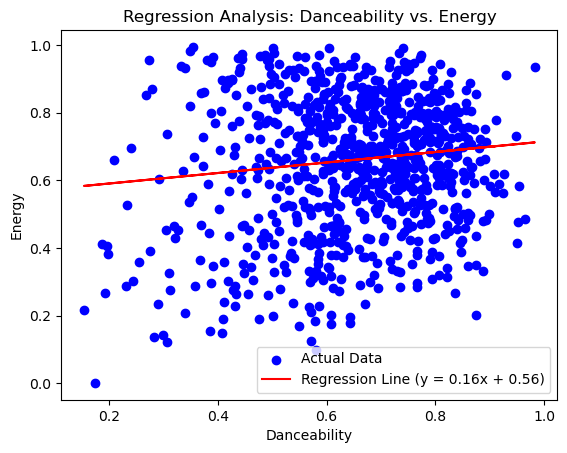

In [206]:
df = df

# Select features and target
X = df[['Danceability']]  # Independent variable (feature)
y = df['Energy']           # Dependent variable (target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label=f'Regression Line (y = {coef:.2f}x + {intercept:.2f})')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.title('Regression Analysis: Danceability vs. Energy')
plt.show()


In [256]:
import pandas as pd 

#data for 15 input song trials 
data = {
    'Genre': ["Dance Pop", "Hip-Hop", "Alternative Dance", "Pop", "Pop", "R&B", "J-Pop", "Pop", "K-Pop", "Reggaeton", "Ballad", "Rap", "Pop", "Afrobeats", "Pop"],
    'Artist': ["Avril Lavigne", "Doja Cat", "King Gnu", "Laufey", "Doja Cat", "DEAN", "Sim","Taylor Swift", "Jeon Somi", "Rauw Alejandro", "Adele", "21 Savage", "Michael Buble", "Rema", "Ariana Grande"],
    'Danceability': [0.564, 0.75,0.566, 0.664, 0.868, 0.411, 0.459, 0.661, 0.758, 0.795, 0.64, 0.872, 0.339, 0.768, 0.623 ],
    'Energy': [0.671, 0.674, 0.85, 0.405, 0.538, 0.359, 0.878, 0.729, 0.693, 0.958, 0.395, 0.591, 0.214, 0.663, 0.734 ],
    'Number of Liked Songs': [3, 3, 1, 4, 3, 5, 3, 6, 5, 6, 7, 7, 7, 6, 6]
}

df = pd.DataFrame(data)

print(df)

                Genre          Artist  Danceability  Energy  \
0           Dance Pop   Avril Lavigne         0.564   0.671   
1             Hip-Hop        Doja Cat         0.750   0.674   
2   Alternative Dance        King Gnu         0.566   0.850   
3                 Pop          Laufey         0.664   0.405   
4                 Pop        Doja Cat         0.868   0.538   
5                 R&B            DEAN         0.411   0.359   
6               J-Pop             Sim         0.459   0.878   
7                 Pop    Taylor Swift         0.661   0.729   
8               K-Pop       Jeon Somi         0.758   0.693   
9           Reggaeton  Rauw Alejandro         0.795   0.958   
10             Ballad           Adele         0.640   0.395   
11                Rap       21 Savage         0.872   0.591   
12                Pop   Michael Buble         0.339   0.214   
13          Afrobeats            Rema         0.768   0.663   
14                Pop   Ariana Grande         0.623   0

In [257]:
#average number of liked songs across all 15 trials 
average_liked_songs = df['Number of Liked Songs'].mean()

print(f'Average Number of Liked Songs: {average_liked_songs}')

Average Number of Liked Songs: 4.8


In [258]:
from sklearn.metrics import mean_squared_error

#create predictions for each trial using average 
baseline_predictions = [average_liked_songs] * len(df)

#compare predictions with actual number of liked songs 
mse_baseline = mean_squared_error(df['Number of Liked Songs'], baseline_predictions)
print(f'Mean Squared Error (Baseline): {mse_baseline}')

Mean Squared Error (Baseline): 3.2266666666666666


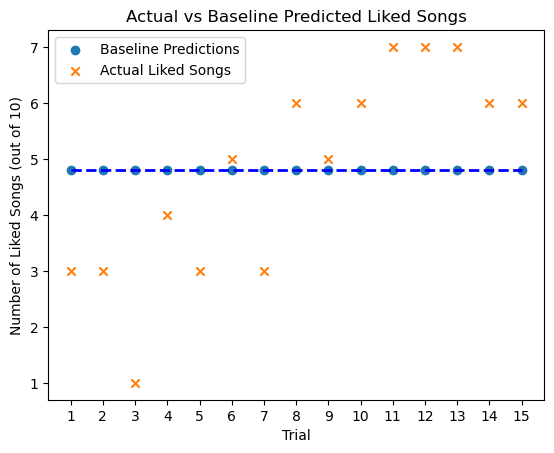

In [259]:
import matplotlib.pyplot as plt

# Assuming baseline_predictions is a list with the constant average value repeated for each trial
baseline_predictions = [df['Number of Liked Songs'].mean()] * len(df)
# Scatter plot for baseline predictions
plt.scatter(df.index + 1, baseline_predictions, label='Baseline Predictions')
# Scatter plot for actual number of liked songs
plt.scatter(df.index + 1, df['Number of Liked Songs'], label='Actual Liked Songs', marker='x')
plt.plot([min(df.index + 1), max(df.index + 1)], [min(baseline_predictions), max(baseline_predictions)], color='blue', linestyle='--', linewidth=2)

plt.xticks(df.index + 1)
plt.xlabel('Trial')
plt.ylabel('Number of Liked Songs (out of 10)')
plt.title('Actual vs Baseline Predicted Liked Songs')
plt.legend()
plt.show()